In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import theano
import theano.tensor as T
import matplotlib.pyplot as plt

import os, sys
sys.path.append('../code')

from retina import *

/home/oalenkin/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### data reading

In [2]:
data = pd.read_csv('../data/hits.csv', index_col=0)

# Stage 2.1

### test function distance_between_skew_lines()

In [3]:
from retina import distance_between_skew_lines, points2vec, get_track_params, params2vec

In [4]:
real = []
exp = []
for event_i in set(data.EventID.values):
    event = data[data.EventID==event_i]
    track1 = event[(event.TrackID==2)&(event.StatNb<3)]
    if len(track1)>1:
        x0=track1.X.values[0]
        x1=track1.X.values[1]
        y0=track1.Y.values[0]
        y1=track1.Y.values[1]
        z0=track1.Z.values[0]
        z1=track1.Z.values[1]
    else:
        continue
    track_point, track_direction = points2vec(np.array([x0, y0, z0, x1, y1, z1]))
    #x0, l, y0, m = get_track_params(track1, 2)
    #track_point, track_direction = params2vec(l, x0, m, y0)
    for i in range(len(track1)):
        params = track1[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values[i]
        tube_point, tube_direction = points2vec(params)
        exp.append(distance_between_skew_lines(track_point, track_direction, tube_point, tube_direction))
        real.append(track1.dist2Wire.values[i])
        
    track2 = event[(event.TrackID==3)&(event.StatNb<3)]
    if len(track2)>1:
        x0=track2.X.values[0]
        x1=track2.X.values[1]
        y0=track2.Y.values[0]
        y1=track2.Y.values[1]
        z0=track2.Z.values[0]
        z1=track2.Z.values[1]
    else:
        continue
    track_point, track_direction = points2vec(np.array([x0, y0, z0, x1, y1, z1]))
    #x0, l, y0, m = get_track_params(track2, 3)
    #track_point, track_direction = params2vec(l, x0, m, y0)
    for i in range(len(track2)):
        params = track2[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values[i]
        tube_point, tube_direction = points2vec(params)
        exp.append(distance_between_skew_lines(track_point, track_direction, tube_point, tube_direction))
        real.append(track2.dist2Wire.values[i])

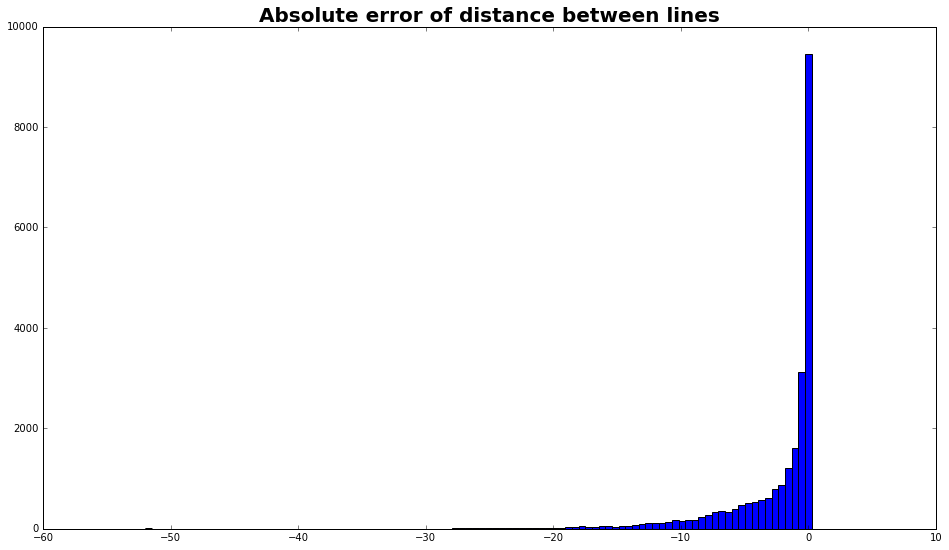

In [5]:
plt.figure(figsize=(16,9))
plt.title("Absolute error of distance between lines", fontsize=20, fontweight='bold')
hist_arr = plt.hist(np.array(real)-np.array(exp), bins=100)

Result is strange. A lot of distances from track to its tubes were found with huge error. May be realization is the reason of this effect. May be tracks reconstructed from 2 points are wrong.

### how to use artifitial_retina_response()

In [4]:
from retina import artifitial_retina_response

In [5]:
artifitial_retina_response(0.005, 250, 0.005, 500, event[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values, 0.5)

NameError: name 'event' is not defined

# Stage 2.2

# 2D projections

In [5]:
from retina import plot_artifitial_retina_response, params2vec

In [7]:
event = data[data.EventID==23]
event_before_magnet = event[event.StatNb<3]

In [8]:
size = 25
ms = np.linspace(0.009, 0.01, size)
y0s = np.linspace(-153, -149, size)
ls = np.linspace(-0.0021, 0.0017, size)
x0s = np.linspace(-75, -65, size)

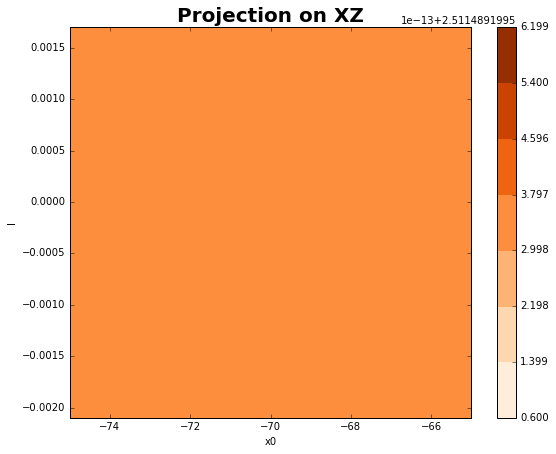

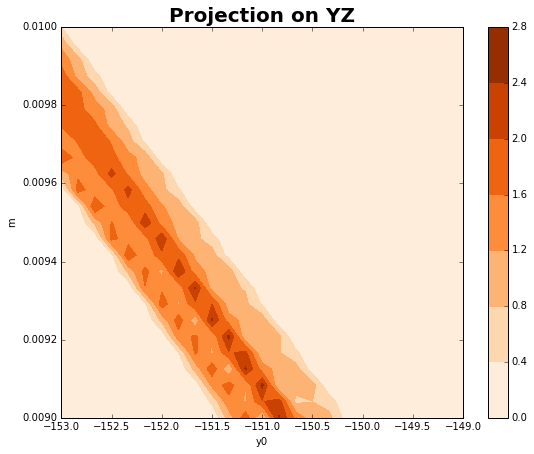

In [14]:
projections = plot_artifitial_retina_response(event_before_magnet, ms, y0s, ls, x0s, 0.1)

In [4]:
from retina import get_track_params

In [5]:
get_track_params(event_before_magnet, 2)

(-71.93019431301461,
 -0.019083404599996478,
 -151.87648248209635,
 0.0094009400000002064)

In [6]:
get_track_params(event_before_magnet, 3)

(-90.378411160590431,
 0.0015087299923260595,
 -115.21658250100649,
 -0.042832547618818356)

# Stage 2.3

In [4]:
from retina import RetinaTrackReconstruction

In [5]:
retina = RetinaTrackReconstruction()

In [15]:
retina.fit(event_before_magnet[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values, [-71, -0.019, -152.5, 0.0092], 0.1)

((-71.000001377163912,
  -0.019000074830489672,
  -152.49247340710687,
  0.0096282589758319801),
 array([[[ -7.10000000e+01,  -1.52500000e+02,   0.00000000e+00],
         [ -1.90000000e-02,   9.20000000e-03,   1.00000000e+00]],
 
        [[ -7.10000000e+01,  -1.52500000e+02,  -1.53462475e-09],
         [ -1.90000000e-02,   9.63098873e-03,   9.99996035e-01]],
 
        [[ -7.10000000e+01,  -1.52492474e+02,  -7.24820131e-05],
         [ -1.90000000e-02,   9.62619064e-03,   9.99996081e-01]],
 
        [[ -7.10000000e+01,  -1.52492474e+02,  -7.24820256e-05],
         [ -1.90000000e-02,   9.62822106e-03,   9.99996062e-01]]]),
 array([ -1.07641124e-20,  -2.15115088e+00,  -2.15359035e+00,
         -2.15600310e+00]))